In [1]:
#using Utk face dataset
#downlaod and sampled upto 60 images for testing the algorithm
#https://www.kaggle.com/datasets/jangedoo/utkface-new

In [2]:
#creating dataframe to store orginal age and gender of the images

In [1]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
import os
import pandas as pd

# Path to the directory containing the image files
directory = 'C://Users/gauth/OneDrive/Desktop/DIP PROJECT/g3'

# List to store extracted information
data = []

# Iterate over files in the directory
for filename in os.listdir(directory):
    # Split filename by ".chip" to get the main part
    main_part = filename.split(".chip")[0]
    
    # Split main part by "_" to extract age and gender
    age, gender, *rest = main_part.split("_")
    
    # Convert gender to string representation
    gender = "Male" if gender == "0" else "Female"
    
    # Join the rest of the filename back together (if any)
    rest = "_".join(rest)
    
    # Append extracted information to the list
    data.append({'Filename': filename, 'Age': int(age), 'Gender': gender})

# Create DataFrame from the extracted information
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


                                              Filename  Age  Gender
0    10_0_0_20170110225505288.jpg.chip - Copy - Cop...   10    Male
1    10_0_0_20170110225601897.jpg.chip - Copy - Cop...   10    Male
2    10_0_0_20170116201337172.jpg.chip - Copy - Cop...   10    Male
3    10_0_0_20170117135444407.jpg.chip - Copy - Cop...   10    Male
4               116_1_2_20170112220255503.jpg.chip.jpg  116  Female
..                                                 ...  ...     ...
145  7_0_0_20170110215620675.jpg.chip - Copy - Copy...    7    Male
146  7_0_0_20170110215633251.jpg.chip - Copy - Copy...    7    Male
147              85_1_0_20170110182128680.jpg.chip.jpg   85  Female
148              96_1_2_20170110182504813.jpg.chip.jpg   96  Female
149              96_1_2_20170110182526540.jpg.chip.jpg   96  Female

[150 rows x 3 columns]


In [3]:
#face detection using yolo+predictions using caffe model on utk face images.

In [4]:
import numpy as np
import cv2
import os
import os
from ultralytics import YOLO

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

ageProto = "age_deploy.prototxt"
ageModel = "age_net.caffemodel"

genderProto = "gender_deploy.prototxt"
genderModel = "gender_net.caffemodel"

ageNet = cv2.dnn.readNet(ageModel, ageProto)
genderNet = cv2.dnn.readNet(genderModel, genderProto)

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']





folder_path = 'C://Users/gauth/OneDrive/Desktop/DIP PROJECT/g3'

# List all image files in the folder

image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) ]
print(len(image_files))
# Iterate over each image
result_list=[]
model=YOLO("yolov8n-face.pt")
for image_file in image_files:
    # Read image
    img = cv2.imread(image_file)
    results=model(img)
    result_list.append(results)
    boxes=results[0].boxes
    
    
     
    #looping over the faces detected from yolo
    for box in boxes:
        top_left_x=int(box.xyxy.tolist()[0][0])
        top_left_y=int(box.xyxy.tolist()[0][1])
        bottom_right_x=int(box.xyxy.tolist()[0][2])
        bottom_right_y=int(box.xyxy.tolist()[0][3])
        
        cv2.rectangle(img,( top_left_x,top_left_y),(bottom_right_x,  bottom_right_y),(255,0,0),2)
        detected_face=img[top_left_y:bottom_right_y,  top_left_x:bottom_right_x]
        
        detected_face_blob = cv2.dnn.blobFromImage(detected_face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
       
        
        genderNet.setInput(detected_face_blob)
        ageNet.setInput(detected_face_blob)
        
        genderPreds = genderNet.forward()
       
        
        gender = genderList[genderPreds[0].argmax()]
        
        
        agePreds=ageNet.forward()
        
        age = ageList[agePreds[0].argmax()]
        
        
        label = "{}{}".format(gender,age)
       
        cv2.putText(img, label, (top_left_x+30, top_left_y+30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1, cv2.LINE_AA)
        
        #loading predicted results to the existing df
        df.loc[df['Filename'] == os.path.basename(image_file), 'Predicted_Gender'] = gender
        df.loc[df['Filename'] == os.path.basename(image_file), 'Predicted_Age'] = age
    #cv2.imshow("ok",img)
   
    cv2.waitKey(0)
    

       

cv2.destroyAllWindows()    
        
        
        




150

0: 480x640 1 face, 577.7ms
Speed: 13.4ms preprocess, 577.7ms inference, 4477.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 313.1ms
Speed: 6.0ms preprocess, 313.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 292.1ms
Speed: 5.9ms preprocess, 292.1ms inference, 4.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 309.7ms
Speed: 5.1ms preprocess, 309.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 faces, 260.4ms
Speed: 4.0ms preprocess, 260.4ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 faces, 226.5ms
Speed: 3.9ms preprocess, 226.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 240.4ms
Speed: 3.3ms preprocess, 240.4ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 278.9ms
Speed: 7.0ms preprocess, 278.9ms inference, 2.0ms postprocess per image at shape


0: 480x640 1 face, 270.7ms
Speed: 7.9ms preprocess, 270.7ms inference, 3.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 277.3ms
Speed: 3.2ms preprocess, 277.3ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 212.9ms
Speed: 8.7ms preprocess, 212.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 236.3ms
Speed: 7.3ms preprocess, 236.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 256.4ms
Speed: 4.5ms preprocess, 256.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 296.9ms
Speed: 5.4ms preprocess, 296.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 faces, 309.6ms
Speed: 5.0ms preprocess, 309.6ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 faces, 244.8ms
Speed: 8.4ms preprocess, 244.8ms inference, 2.0ms postprocess per image at shape (1, 3, 


0: 480x640 1 face, 196.3ms
Speed: 5.0ms preprocess, 196.3ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 171.0ms
Speed: 4.0ms preprocess, 171.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 faces, 170.0ms
Speed: 4.0ms preprocess, 170.0ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 171.9ms
Speed: 5.0ms preprocess, 171.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 171.4ms
Speed: 5.0ms preprocess, 171.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 429.7ms
Speed: 7.1ms preprocess, 429.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 faces, 361.3ms
Speed: 2.3ms preprocess, 361.3ms inference, 5.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 284.6ms
Speed: 9.0ms preprocess, 284.6ms inference, 4.9ms postprocess per image at shap

In [5]:
df

,Filename,Age,Gender,Predicted_Gender,Predicted_Age
0,10_0_0_20170110225505288.jpg.chip - Copy - Cop...,10,Male,Male,(4-6)
1,10_0_0_20170110225601897.jpg.chip - Copy - Cop...,10,Male,Male,(4-6)
2,10_0_0_20170116201337172.jpg.chip - Copy - Cop...,10,Male,Male,(38-43)
3,10_0_0_20170117135444407.jpg.chip - Copy - Cop...,10,Male,Male,(25-32)
4,116_1_2_20170112220255503.jpg.chip.jpg,116,Female,Male,(0-2)
...,...,...,...,...,...
145,7_0_0_20170110215620675.jpg.chip - Copy - Copy...,7,Male,Male,(25-32)
146,7_0_0_20170110215633251.jpg.chip - Copy - Copy...,7,Male,Male,(25-32)
147,85_1_0_20170110182128680.jpg.chip.jpg,85,Female,Male,(0-2)
148,96_1_2_20170110182504813.jpg.chip.jpg,96,Female,Male,(48-53)


In [6]:
df[30:60]

,Filename,Age,Gender,Predicted_Gender,Predicted_Age
30,1_0_4_20170103210731970.jpg.chip - Copy.jpg,1,Male,Male,(25-32)
31,1_2_20170104165057208.jpg.chip.jpg,1,Female,Male,(25-32)
32,26_0_3_20170119184110103.jpg.chip - Copy - Cop...,26,Male,Male,(25-32)
33,26_1_0_20170117201904253.jpg.chip - Copy - Cop...,26,Female,Female,(8-12)
34,26_1_1_20170113012119680.jpg.chip - Copy - Cop...,26,Female,Male,(8-12)
35,26_1_1_20170113012233232.jpg.chip - Copy - Cop...,26,Female,Female,(25-32)
36,26_1_1_20170113012350417.jpg.chip - Copy - Cop...,26,Female,Male,(25-32)
37,29_0_0_20170116225141614.jpg.chip.jpg,29,Male,NaN,NaN
38,29_0_0_20170116233154004.jpg.chip.jpg,29,Male,Male,(25-32)
39,29_0_0_20170117010514579.jpg.chip.jpg,29,Male,Male,(25-32)


In [7]:
# Calculate accuracy for predicted age
correct_age_predictions = 0
for index, row in df.iterrows():
    actual_age = row['Age']
    predicted_age_range = row['Predicted_Age']
    if isinstance(predicted_age_range, str):  # Check if the predicted age range is a string
        predicted_age_start, predicted_age_end = map(int, predicted_age_range.strip('()').split('-'))  # Extract start and end of predicted age range
        if actual_age >= predicted_age_start and actual_age <= predicted_age_end:
            correct_age_predictions += 1

total_images = df.shape[0]
age_accuracy = correct_age_predictions / total_images * 100



# Calculate accuracy for predicted gender
correct_gender_predictions = (df['Gender'] == df['Predicted_Gender']).sum()
gender_accuracy = correct_gender_predictions / total_images * 100

# Print results
print("Accuracy for predicted age: {:.2f}%".format(age_accuracy))
print("Accuracy for predicted gender: {:.2f}%".format(gender_accuracy))

Accuracy for predicted age: 28.00%
Accuracy for predicted gender: 69.33%


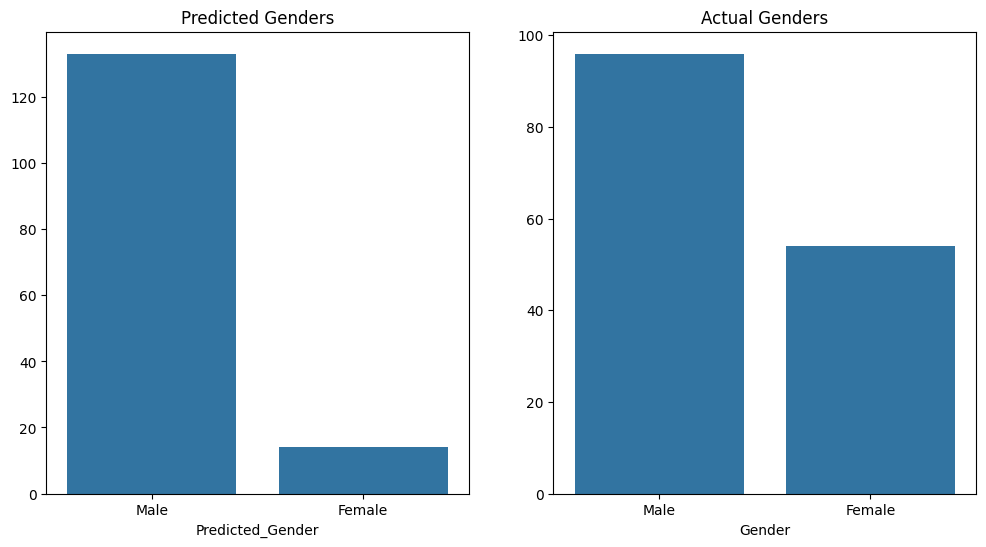

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains the DataFrame with columns 'Predicted_Gender' and 'Gender'
# Replace 'df' with the actual DataFrame name if different
# Replace 'Predicted_Gender' and 'Gender' with the actual column names if different

# Count the occurrences of predicted and actual genders
predicted_gender_counts = df['Predicted_Gender'].value_counts()
actual_gender_counts = df['Gender'].value_counts()

# Create a figure and axis object
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot predicted genders
sns.barplot(x=predicted_gender_counts.index, y=predicted_gender_counts.values, ax=axes[0])
axes[0].set_title('Predicted Genders')

# Plot actual genders
sns.barplot(x=actual_gender_counts.index, y=actual_gender_counts.values, ax=axes[1])
axes[1].set_title('Actual Genders')

# Adjust layout to prevent overlap


# Show the plot
plt.show()

C:\Users\gauth\AppData\Local\Temp\ipykernel_7588\4158931325.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=predicted_age_counts.index, y=predicted_age_counts.values, ax=axes[0], palette="muted")
C:\Users\gauth\AppData\Local\Temp\ipykernel_7588\4158931325.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actual_age_counts.index, y=actual_age_counts.values, ax=axes[1], palette="muted")


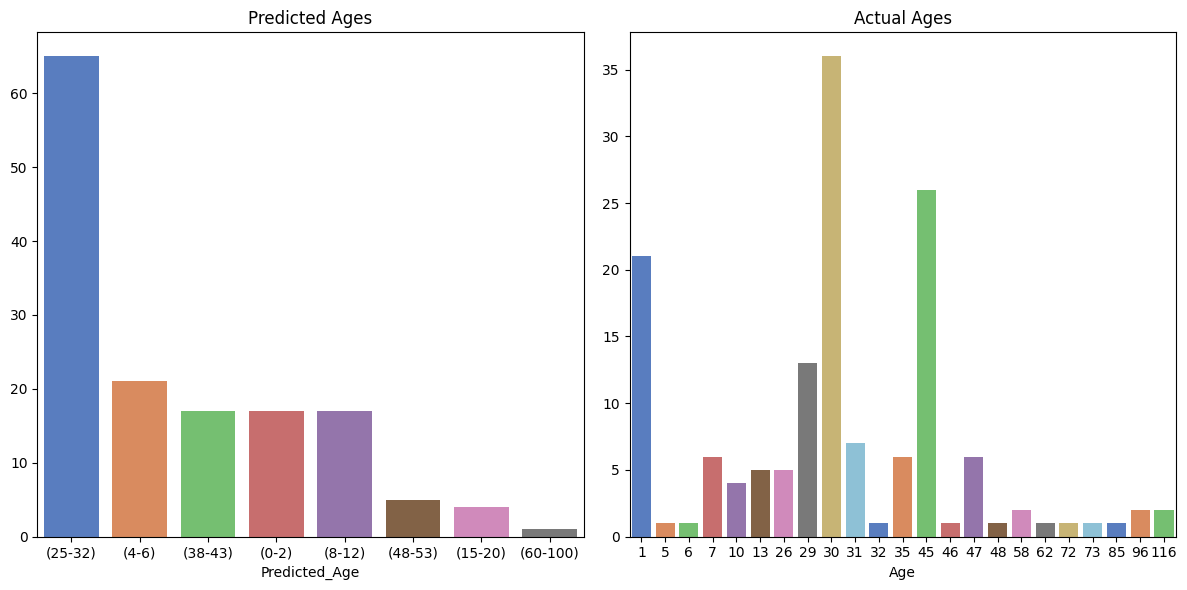

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of predicted and actual ages
predicted_age_counts = df['Predicted_Age'].value_counts()
actual_age_counts = df['Age'].value_counts()

# Create a figure and axis object
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot predicted ages
sns.barplot(x=predicted_age_counts.index, y=predicted_age_counts.values, ax=axes[0], palette="muted")
axes[0].set_title('Predicted Ages')

# Plot actual ages
sns.barplot(x=actual_age_counts.index, y=actual_age_counts.values, ax=axes[1], palette="muted")
axes[1].set_title('Actual Ages')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


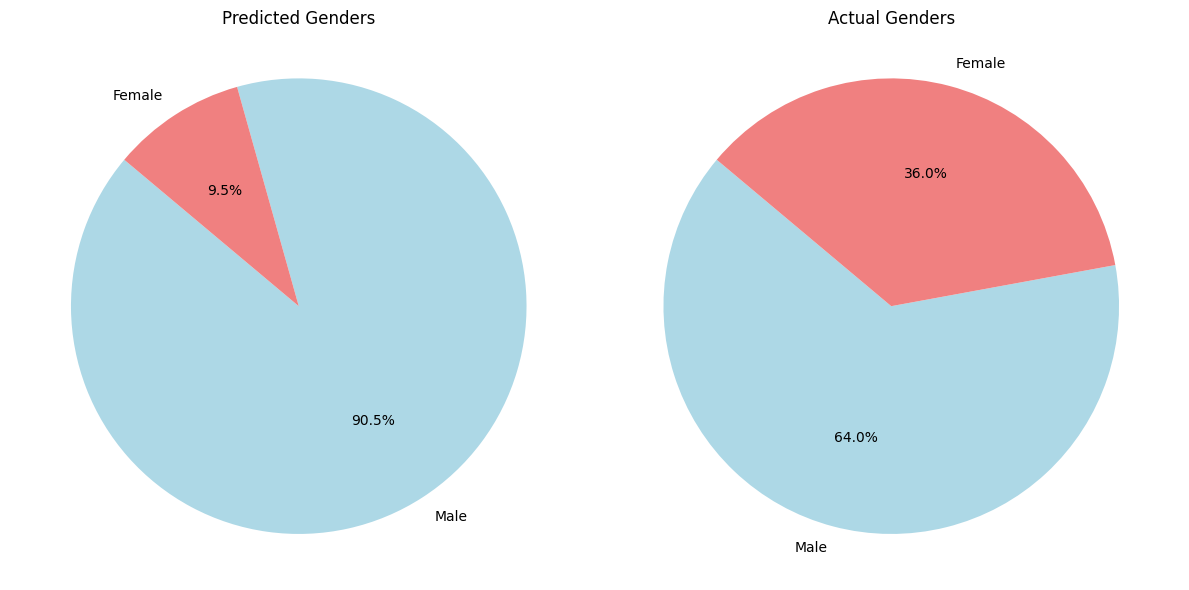

In [10]:


# Count the occurrences of predicted and actual genders
predicted_gender_counts = df['Predicted_Gender'].value_counts()
actual_gender_counts = df['Gender'].value_counts()

# Create a figure and axis object
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create a pie chart for predicted genders
axes[0].pie(predicted_gender_counts, labels=predicted_gender_counts.index, colors=['lightblue', 'lightcoral'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Predicted Genders')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Create a pie chart for actual genders
axes[1].pie(actual_gender_counts, labels=actual_gender_counts.index, colors=['lightblue', 'lightcoral'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Actual Genders')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


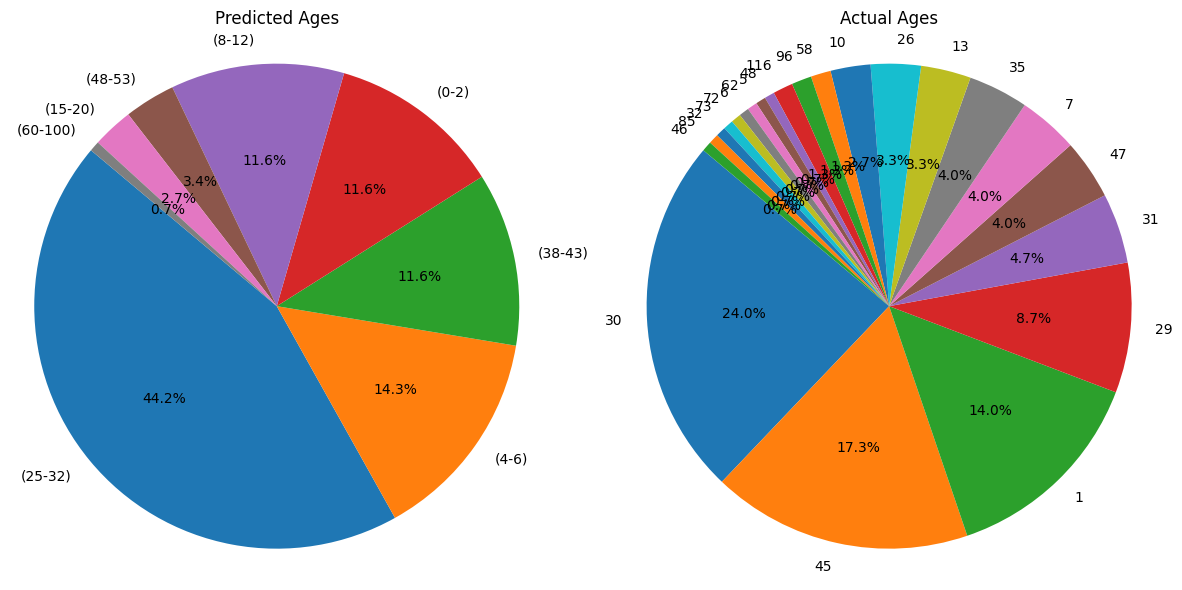

In [11]:
import matplotlib.pyplot as plt



# Create separate figures for ages
plt.figure(figsize=(12, 6))

# Plot pie chart for predicted ages
plt.subplot(1, 2, 1)
plt.pie(predicted_age_counts, labels=predicted_age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Predicted Ages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Plot pie chart for actual ages
plt.subplot(1, 2, 2)
plt.pie(actual_age_counts, labels=actual_age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Actual Ages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots for ages
plt.show()
